In [1]:
# pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statistics as stat

# from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import xgboost as xgb
from xgboost import XGBClassifier

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where, nan

In [3]:
pd.options.display.max_rows = 4000

### Importing the data

In [4]:
data = pd.read_csv('Train1.csv', encoding='ISO-8859-1')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Overview

In [5]:
pd.set_option("display.max_columns", 150)
data.head()

,ID,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,DDEAD,DDEADD,DDEADC,DDEADX,FDEAD,FLASTD,FDEADD,FDEADC,FDEADX,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,DIED,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,OCCODE,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,1,1,17,D,M,69,Y,NaN,Y,Y,NaN,NaN,140,N,N,N,Y,N,Y,N,Y,PACS,sty-91,99,99,4,Y,N,Y,Y,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,E,NaN,NaN,14.0,187.0,UK,27,NaN,13,Y,Y,0,187.0,0.6980,0.2344,0.1054,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,10,F,M,76,Y,NaN,Y,N,NaN,NaN,150,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,7,N,L,N,Y,Y,NaN,N,14,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,16.0,192.0,UK,27,NaN,NaN,Y,Y,0,192.0,0.5389,0.1555,0.0421,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,24,F,M,23,N,NaN,Y,N,NaN,NaN,120,N,N,N,N,N,N,N,Y,OTH,lut-91,99,99,2,N,L,N,N,Y,NaN,N,11,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,A,NaN,NaN,37.0,193.0,UK,27,NaN,NaN,Y,Y,0,193.0,0.1500,0.0038,0.0054,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,5,D,F,83,N,NaN,N,N,NaN,NaN,130,Y,Y,Y,Y,Y,N,N,N,TACS,Mar-91,99,99,6,N,H,N,N,N,NaN,N,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,N,Y,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,N,D,NaN,NaN,24.0,242.0,UK,27,NaN,4,Y,N,0,242.0,0.9489,0.5412,0.2304,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,1,8,D,F,64,Y,NaN,Y,Y,NaN,NaN,180,Y,Y,Y,N,Y,Y,N,N,TACS,Mar-91,99,99,2,Y,H,Y,Y,N,NaN,Y,14,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,N,NaN,0.0,NaN,N,NaN,NaN,NaN,NaN,N,Y,A,NaN,NaN,21.0,198.0,UK,27,NaN,NaN,Y,Y,0,198.0,0.8480,0.2780,0.1559,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# drop the fields that are not in the test dataset
data.drop(columns= ['DDEAD','DDEADD','DDEADC','DDEADX','FDEAD','FDEADD','FDEADC','FDEADX','OCCODE'], inplace=True)

In [7]:
data.isnull().sum()

ID              0
HOSPNUM         0
RDELAY          0
RCONSC          0
SEX             0
AGE             0
RSLEEP          0
RATRIAL       484
RCT             0
RVISINF         0
RHEP24        175
RASP3         484
RSBP            0
RDEF1           0
RDEF2           0
RDEF3           0
RDEF4           0
RDEF5           0
RDEF6           0
RDEF7           0
RDEF8           0
STYPE           0
RDATE           0
HOURLOCAL       0
MINLOCAL        0
DAYLOCAL        0
RXASP           0
RXHEP           0
DASP14         12
DASPLT         81
DLH14          14
DMH14         498
DHH14        9278
ONDRUG          0
DSCH          152
DIVH          152
DAP            11
DOAC           11
DGORM          15
DSTER          16
DCAA           17
DHAEMD         16
DCAREND       498
DTHROMB       158
DMAJNCH         8
DMAJNCHD     9686
DMAJNCHX     9689
DSIDE           8
DSIDED       9442
DSIDEX       9438
DDIAGISC       12
DDIAGHA        12
DDIAGUN        10
DNOSTRK        12
DNOSTRKX     9560
DRSISC    

In [8]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'DIED', 'TD', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [9]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP']


In [10]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
HOSPNUM      [1, 6, 4, 8, 3, 10, 2, 5, 15, 16, 11, 13, 17, ...
RDELAY       [17, 10, 24, 5, 8, 21, 4, 13, 2, 45, 18, 19, 3...
AGE          [69, 76, 23, 83, 64, 66, 74, 87, 43, 57, 71, 7...
RSBP         [140, 150, 120, 130, 180, 110, 190, 160, 170, ...
HOURLOCAL    [99, 12, 11, 14, 22, 13, 15, 9, 10, 17, 19, 8,...
MINLOCAL     [99, 25, 19, 4, 11, 26, 51, 54, 52, 38, 36, 1,...
DAYLOCAL                                 [4, 7, 2, 6, 3, 1, 5]
ONDRUG       [14, 11, 10, 4, 7, 1, 8, 5, 3, 6, 9, 12, 13, 0...
DMAJNCHD     [nan, 10.0, 14.0, 1.0, 7.0, 5.0, 4.0, 8.0, 6.0...
DSIDED       [nan, 1.0, 8.0, 12.0, 11.0, 14.0, 2.0, 4.0, 7....
DRSISCD      [nan, 2.0, 3.0, 53.0, 1.0, 7.0, 5.0, 10.0, 6.0...
DRSHD        [nan, 3.0, 2.0, 12.0, 9.0, 0.0, 1.0, 6.0, 14.0...
DRSUNKD      [nan, 4.0, 14.0, 23.0, 0.0, 2.0, 15.0, 3.0, 13...
DPED         [nan, 11.0, 23.0, 1.0, 4.0, 6.0, 12.0, 16.0, 8...
DALIVED      [nan, 11.0, 4.0, 7.0, 20.0, 10.0, 44.0, 5.

In [11]:
# these fields should be categorical 
for col in ['SET14D','ID14','DEAD1','DEAD2','DEAD3','DEAD4','DEAD5','DEAD6','DEAD7','DEAD8',
'H14','ISC14','NK14','STRK14','HTI14','PE14','DVT14','TRAN14','NCB14']: 
    data[col] = data[col].astype('object')

In [12]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'DIED', 'TD', 'EXPDD', 'EXPD6', 'EXPD14']


In [13]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [14]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [D, F, U]
SEX                                                    [M, F]
RSLEEP                                                 [Y, N]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [Y, N]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [N, Y, C]
RDEF2                                               [N, Y, C]
RDEF3                                               [N, Y, C]
RDEF4                                               [Y, N, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [Y, N, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [Y, N, C]
STYPE   

In [15]:
data.describe(include="object").T

,count,unique,top,freq
RCONSC,9762,3,F,7518
SEX,9762,2,M,5261
RSLEEP,9762,2,N,6909
RATRIAL,9278,2,N,7718
RCT,9762,2,Y,6492
RVISINF,9762,2,N,6590
RHEP24,9587,2,N,9367
RASP3,9278,2,N,7312
RDEF1,9762,3,Y,7060
RDEF2,9762,3,Y,8314


In [16]:
# encode these fields 
data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']] = data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].where(data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].isnull(), 1).fillna(0).astype(object)

In [17]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
HOSPNUM      [1, 6, 4, 8, 3, 10, 2, 5, 15, 16, 11, 13, 17, ...
RDELAY       [17, 10, 24, 5, 8, 21, 4, 13, 2, 45, 18, 19, 3...
AGE          [69, 76, 23, 83, 64, 66, 74, 87, 43, 57, 71, 7...
RSBP         [140, 150, 120, 130, 180, 110, 190, 160, 170, ...
HOURLOCAL    [99, 12, 11, 14, 22, 13, 15, 9, 10, 17, 19, 8,...
MINLOCAL     [99, 25, 19, 4, 11, 26, 51, 54, 52, 38, 36, 1,...
DAYLOCAL                                 [4, 7, 2, 6, 3, 1, 5]
ONDRUG       [14, 11, 10, 4, 7, 1, 8, 5, 3, 6, 9, 12, 13, 0...
DMAJNCHD     [nan, 10.0, 14.0, 1.0, 7.0, 5.0, 4.0, 8.0, 6.0...
DSIDED       [nan, 1.0, 8.0, 12.0, 11.0, 14.0, 2.0, 4.0, 7....
DRSISCD      [nan, 2.0, 3.0, 53.0, 1.0, 7.0, 5.0, 10.0, 6.0...
DRSHD        [nan, 3.0, 2.0, 12.0, 9.0, 0.0, 1.0, 6.0, 14.0...
DRSUNKD      [nan, 4.0, 14.0, 23.0, 0.0, 2.0, 15.0, 3.0, 13...
DPED         [nan, 11.0, 23.0, 1.0, 4.0, 6.0, 12.0, 16.0, 8...
DALIVED      [nan, 11.0, 4.0, 7.0, 20.0, 10.0, 44.0, 5.

In [18]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [D, F, U]
SEX                                                    [M, F]
RSLEEP                                                 [Y, N]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [Y, N]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [N, Y, C]
RDEF2                                               [N, Y, C]
RDEF3                                               [N, Y, C]
RDEF4                                               [Y, N, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [Y, N, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [Y, N, C]
STYPE   

In [19]:
null_perc = data.isna().sum()/data.shape[0]
null_perc

ID           0.000000
HOSPNUM      0.000000
RDELAY       0.000000
RCONSC       0.000000
SEX          0.000000
AGE          0.000000
RSLEEP       0.000000
RATRIAL      0.049580
RCT          0.000000
RVISINF      0.000000
RHEP24       0.017927
RASP3        0.049580
RSBP         0.000000
RDEF1        0.000000
RDEF2        0.000000
RDEF3        0.000000
RDEF4        0.000000
RDEF5        0.000000
RDEF6        0.000000
RDEF7        0.000000
RDEF8        0.000000
STYPE        0.000000
RDATE        0.000000
HOURLOCAL    0.000000
MINLOCAL     0.000000
DAYLOCAL     0.000000
RXASP        0.000000
RXHEP        0.000000
DASP14       0.001229
DASPLT       0.008297
DLH14        0.001434
DMH14        0.051014
DHH14        0.950420
ONDRUG       0.000000
DSCH         0.015571
DIVH         0.015571
DAP          0.001127
DOAC         0.001127
DGORM        0.001537
DSTER        0.001639
DCAA         0.001741
DHAEMD       0.001639
DCAREND      0.051014
DTHROMB      0.016185
DMAJNCH      0.000820
DMAJNCHD  

In [20]:
# before imputation, identify / drop columns with > 20% null 
null_perc[null_perc > 0.2].index

# we may separately determine if these fields are influential in predicting death 

Index(['DHH14', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED',
       'DALIVED', 'DPLACE', 'FLASTD', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP',
       'FOAC', 'NCCODE'],
      dtype='object')

In [21]:
data.shape

(9762, 104)

In [22]:
drop_cols = list(null_perc[null_perc > 0.2].index)
data = data.drop(drop_cols, axis = 1)

In [23]:
data.shape

(9762, 88)

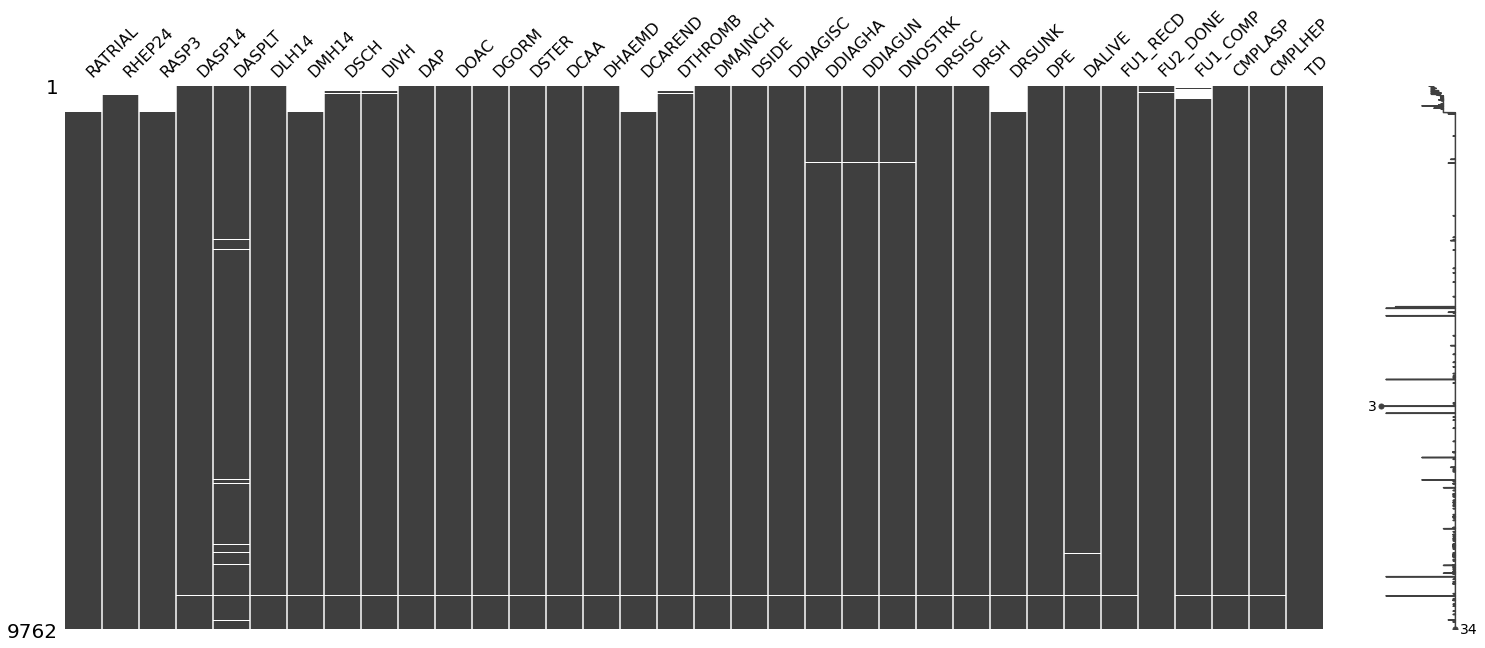

In [24]:
# see if values are Missing completely at random
missingdata_data = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missingdata_data])

This matrix shows how nulls are scattered across the dataset. White segments or lines represent where missing values lie.

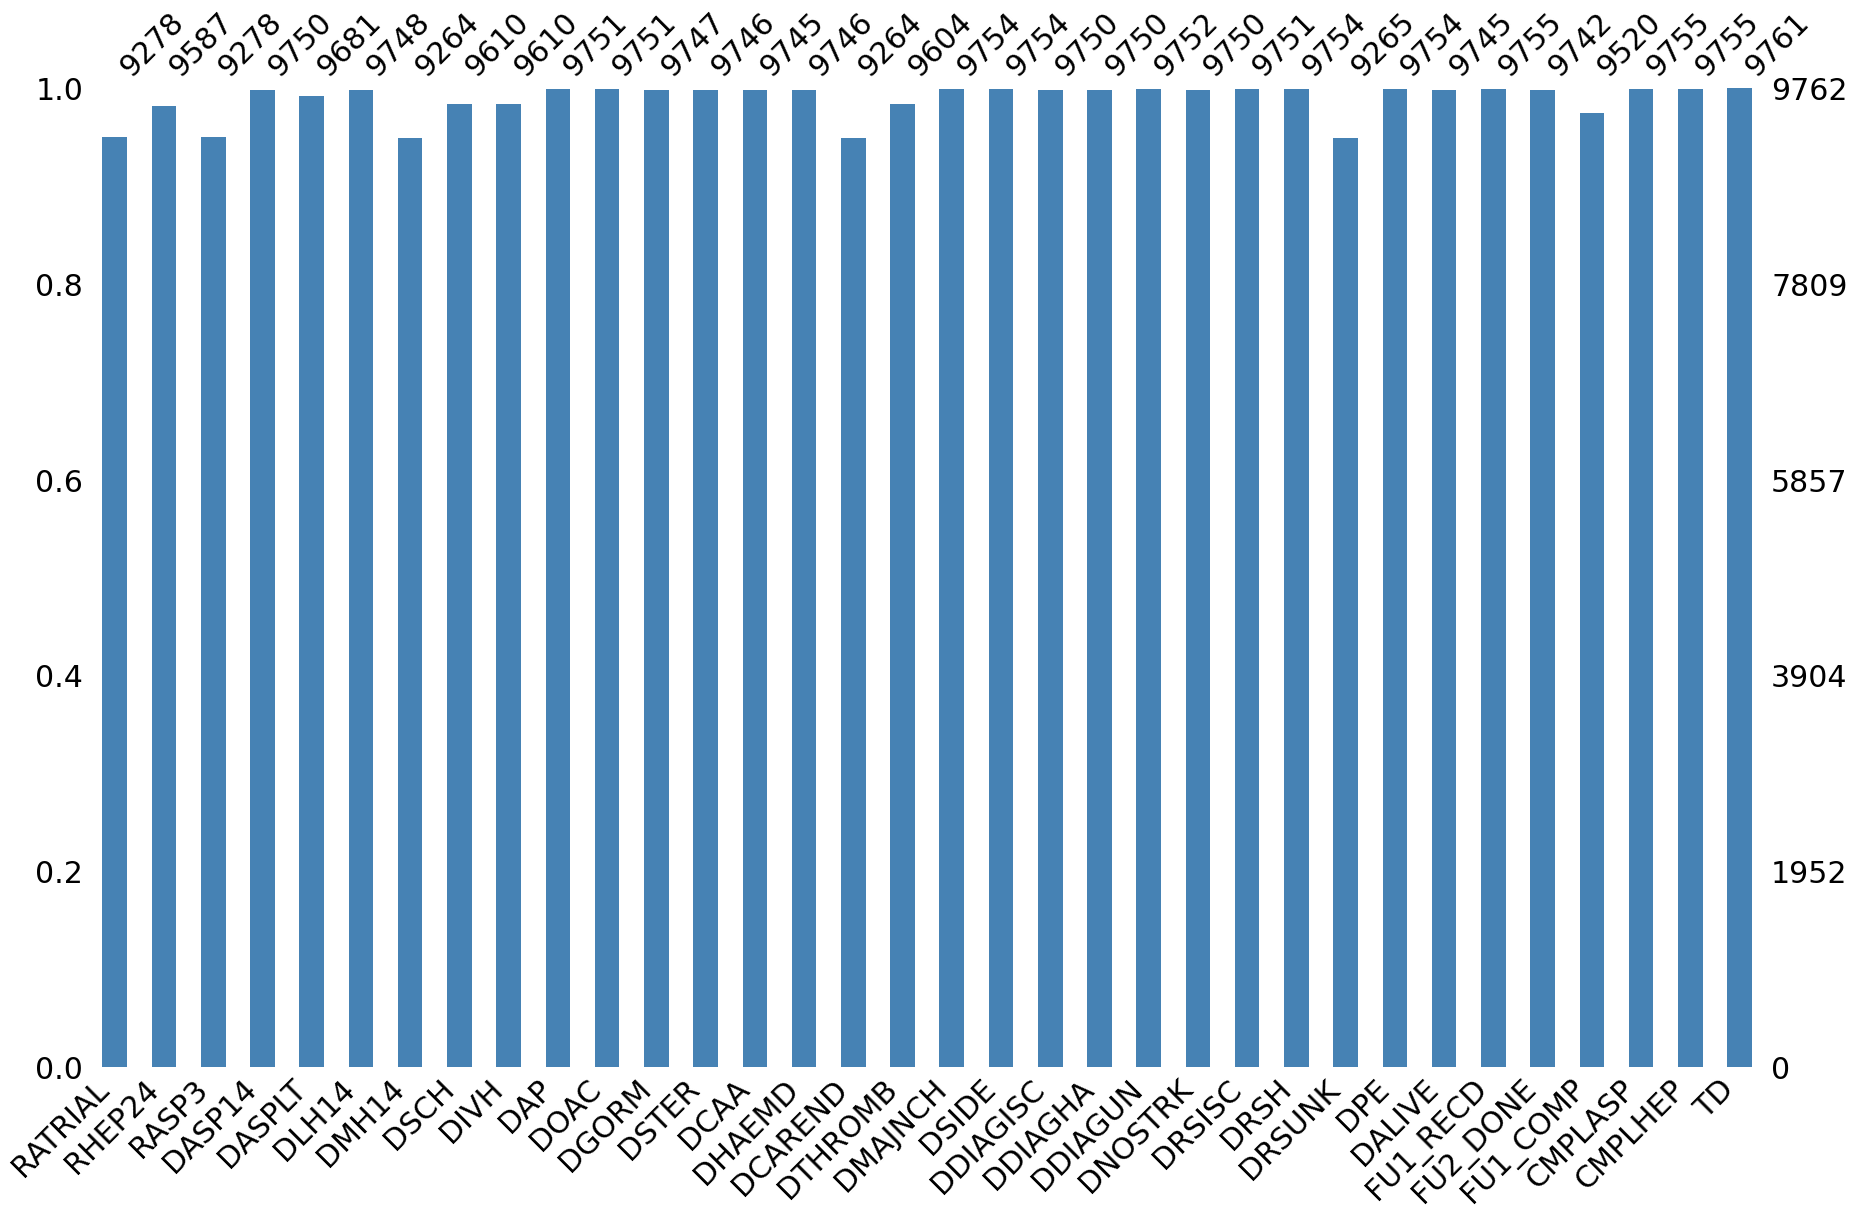

In [25]:
msno.bar(data[missingdata_data], color="steelblue", figsize=(30,18), fontsize=30)

In [26]:
# remove rows with 15 or more missing columns 
for idx in range(data.shape[0]):
    data.loc[idx, 'missing_cnt'] = data.iloc[idx, :].isnull().sum()

In [27]:
threshold = 15
data.drop(data[data['missing_cnt'] >= threshold].index, axis = 0, inplace = True)

data.shape

(9751, 89)

In [28]:
data.drop(columns= ['missing_cnt'], inplace=True)

In [29]:
num = [col for col in data.columns if data[col].dtype != 'object']
obj = [col for col in data.columns if data[col].dtype == 'object']

In [30]:
# Use fillna to impute null values with median in numeric columns 
data.fillna(data[num].median(), inplace = True)

In [31]:
# Use fillna to impute null values with mode in categorical columns 
l = data[obj].mode()
data[obj] = data[obj].fillna(value=l.iloc[0])

In [32]:
data.isna().sum()

ID           0
HOSPNUM      0
RDELAY       0
RCONSC       0
SEX          0
AGE          0
RSLEEP       0
RATRIAL      0
RCT          0
RVISINF      0
RHEP24       0
RASP3        0
RSBP         0
RDEF1        0
RDEF2        0
RDEF3        0
RDEF4        0
RDEF5        0
RDEF6        0
RDEF7        0
RDEF8        0
STYPE        0
RDATE        0
HOURLOCAL    0
MINLOCAL     0
DAYLOCAL     0
RXASP        0
RXHEP        0
DASP14       0
DASPLT       0
DLH14        0
DMH14        0
ONDRUG       0
DSCH         0
DIVH         0
DAP          0
DOAC         0
DGORM        0
DSTER        0
DCAA         0
DHAEMD       0
DCAREND      0
DTHROMB      0
DMAJNCH      0
DMAJNCHX     0
DSIDE        0
DSIDEX       0
DDIAGISC     0
DDIAGHA      0
DDIAGUN      0
DNOSTRK      0
DNOSTRKX     0
DRSISC       0
DRSH         0
DRSUNK       0
DPE          0
DALIVE       0
FU1_RECD     0
FU2_DONE     0
COUNTRY      0
CNTRYNUM     0
FU1_COMP     0
CMPLASP      0
CMPLHEP      0
DIED         0
TD           0
EXPDD     

In [33]:
# All features 
data_num = list(data.select_dtypes(include = np.number).columns)
data_obj = list(data.select_dtypes(include = np.object).columns) 

In [34]:
dum = pd.get_dummies(data[data_obj], drop_first=True)

In [35]:
data_mod = pd.concat([data[data_num], dum], axis = 1)

In [36]:
data_mod.shape

(9751, 164)

In [37]:
data_mod.head()

,ID,HOSPNUM,RDELAY,AGE,RSBP,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,DMAJNCHX,DSIDEX,DNOSTRKX,FU1_RECD,FU2_DONE,CNTRYNUM,FU1_COMP,DIED,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14,RCONSC_F,RCONSC_U,SEX_M,RSLEEP_Y,RATRIAL_Y,RCT_Y,RVISINF_Y,RHEP24_Y,RASP3_Y,RDEF1_N,RDEF1_Y,RDEF2_N,RDEF2_Y,RDEF3_N,RDEF3_Y,RDEF4_N,RDEF4_Y,RDEF5_N,RDEF5_Y,RDEF6_N,RDEF6_Y,RDEF7_N,RDEF7_Y,RDEF8_N,RDEF8_Y,STYPE_OTH,STYPE_PACS,STYPE_POCS,STYPE_TACS,RXASP_Y,RXHEP_L,RXHEP_M,RXHEP_N,DASP14_U,...,DAP_Y,DOAC_U,DOAC_Y,DGORM_U,DGORM_Y,DSTER_U,DSTER_Y,DCAA_U,DCAA_Y,DHAEMD_U,DHAEMD_Y,DCAREND_U,DCAREND_Y,DTHROMB_U,DTHROMB_Y,DMAJNCH_U,DMAJNCH_Y,DSIDE_U,DSIDE_Y,DDIAGISC_U,DDIAGISC_Y,DDIAGISC_u,DDIAGHA_U,DDIAGHA_Y,DDIAGUN_U,DDIAGUN_Y,DNOSTRK_U,DNOSTRK_Y,DRSISC_U,DRSISC_Y,DRSH_U,DRSH_Y,DRSUNK_U,DRSUNK_Y,DPE_U,DPE_Y,DALIVE_U,DALIVE_Y,COUNTRY_AUSL,COUNTRY_AUST,COUNTRY_BELG,COUNTRY_BRAS,COUNTRY_CANA,COUNTRY_CHIL,COUNTRY_CZEC,COUNTRY_DENM,COUNTRY_EIRE,COUNTRY_FINL,COUNTRY_FRAN,COUNTRY_GREE,COUNTRY_HONG,COUNTRY_HUNG,COUNTRY_INDI,COUNTRY_ISRA,COUNTRY_ITAL,COUNTRY_JAPA,COUNTRY_NETH,COUNTRY_NEW,COUNTRY_NORW,COUNTRY_POLA,COUNTRY_PORT,COUNTRY_ROMA,COUNTRY_SING,COUNTRY_SLOK,COUNTRY_SLOV,COUNTRY_SOUT,COUNTRY_SPAI,COUNTRY_SRI,COUNTRY_SWED,COUNTRY_SWIT,COUNTRY_TURK,COUNTRY_UK,COUNTRY_USA,CMPLASP_Y,CMPLHEP_Y
0,1,1,17,69,140,1,99,99,4,14,0,0,0,14.0,187.0,27,16.0,0,187.0,0.6980,0.2344,0.1054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,2,1,10,76,150,1,99,99,7,14,0,0,0,16.0,192.0,27,16.0,0,192.0,0.5389,0.1555,0.0421,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,3,1,24,23,120,1,99,99,2,11,0,0,0,37.0,193.0,27,16.0,0,193.0,0.1500,0.0038,0.0054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,4,1,5,83,130,1,99,99,6,14,0,0,0,24.0,242.0,27,16.0,0,242.0,0.9489,0.5412,0.2304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,6,1,8,64,180,1,99,99,2,14,0,0,0,21.0,198.0,27,16.0,0,198.0,0.8480,0.2780,0.1559,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [38]:
x = data_mod.drop(['ID','DIED'], axis = 1)
y = data_mod['DIED']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.3, random_state = 10)

In [40]:
print(f'{round(sum(y==1)/y.count()*100,3)} % is positive for target variable')

23.218 % is positive for target variable


In [41]:
dum_m = DummyClassifier()
lr_m = LogisticRegression(random_state = 100)

In [42]:
def model(mods, x_train, y_train, x_test, y_test):
    for mod in mods:
        mod.fit(x_train, y_train)
        
        predict_train = mod.predict(x_train)
        accuracy_train = accuracy_score(y_train,predict_train)
        precision_train = precision_score(y_train,predict_train)
        recall_train = recall_score(y_train,predict_train)
        f1_train = f1_score(y_train, predict_train)
        print(mod)
        print('train accuracy: ', round(accuracy_train,3))
        print('train precision: ', round(precision_train,3))
        print('train recall: ', round(recall_train,3))
        print('train f1: ', round(f1_train,3))
        print('confusion matrix (train)')
        print(confusion_matrix(y_train, predict_train))
        print('\n')
        
        predict_test = mod.predict(x_test)
        accuracy_test = accuracy_score(y_test, predict_test)
        precision_test = precision_score(y_test, predict_test)
        recall_test = recall_score(y_test, predict_test)
        f1_test = f1_score(y_test, predict_test)
        print('test accuracy: ', round(accuracy_test,3))
        print('test precision: ', round(precision_test,3))
        print('test recall: ', round(recall_test,3))
        print('test f1: ', round(f1_test,3))
        print('confusion matrix (test)')
        print(confusion_matrix(y_test, predict_test))
        print('\n')
        
        print(metrics.classification_report(y_test, predict_test))

In [43]:
# train models on train set
mods = [dum_m, lr_m]
model(mods, x_train, y_train, x_test, y_test)

DummyClassifier()
train accuracy:  0.647
train precision:  0.238
train recall:  0.236
train f1:  0.237
confusion matrix (train)
[[4044 1196]
 [1211  374]]


test accuracy:  0.652
test precision:  0.243
test recall:  0.237
test f1:  0.24
confusion matrix (test)
[[1746  501]
 [ 518  161]]


              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2247
           1       0.24      0.24      0.24       679

    accuracy                           0.65      2926
   macro avg       0.51      0.51      0.51      2926
weighted avg       0.65      0.65      0.65      2926



C:\Users\User\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


LogisticRegression(random_state=100)
train accuracy:  0.987
train precision:  0.991
train recall:  0.951
train f1:  0.97
confusion matrix (train)
[[5226   14]
 [  78 1507]]


test accuracy:  0.986
test precision:  0.995
test recall:  0.944
test f1:  0.969
confusion matrix (test)
[[2244    3]
 [  38  641]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2247
           1       1.00      0.94      0.97       679

    accuracy                           0.99      2926
   macro avg       0.99      0.97      0.98      2926
weighted avg       0.99      0.99      0.99      2926



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Explainability

In [44]:
lr_m = LogisticRegression(random_state = 100)
lr_m.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [45]:
# pip install shap

In [46]:
# SHAP
import shap
shap.initjs() # JavaScript plots

masker = shap.maskers.Independent(data=x_test)
# Generate the Linear SHAP estimator of Shapley values that corresponds to the LR we built
explainer = shap.Explainer(
    lr_m, masker=masker, algorithm="linear"
)

shap_values = explainer.shap_values(x_test)

### Global Explainability

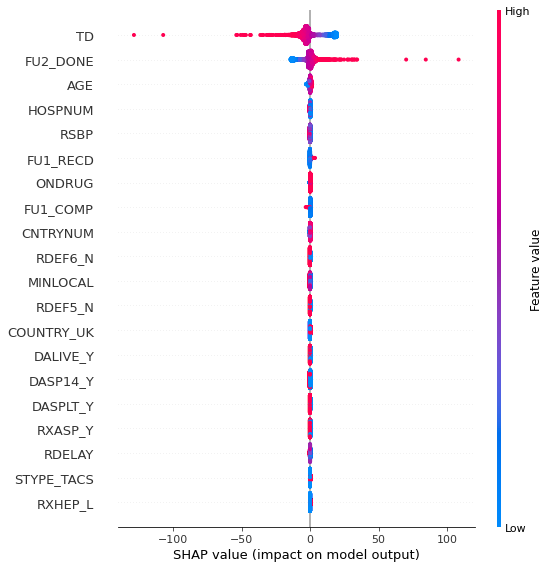

In [47]:
import matplotlib
shap.summary_plot(shap_values,x_test, feature_names=x_test.columns)

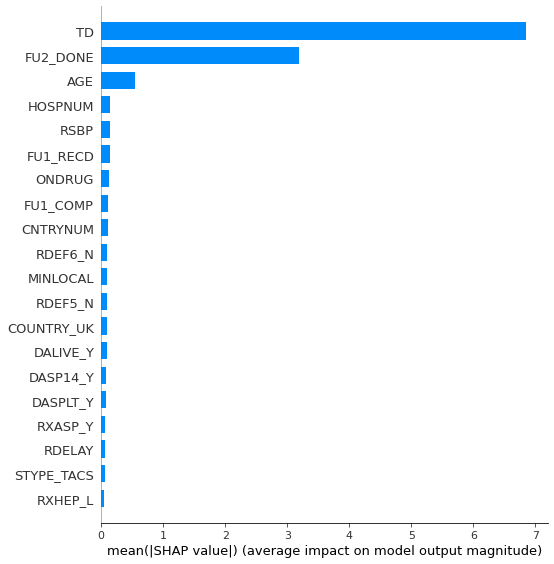

In [48]:
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=x_test.columns)

### Local Explainability

### SHAP

In [49]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
#     explainerModel = shap.TreeExplainer(model)
#     shap_values_Model = explainer.shap_values(S)
    p = shap.force_plot(explainer.expected_value, shap_values[j], np.round(x_test.iloc[[j]],2),matplotlib=True)

    return(p)

### Example Output: Subject 10

In [50]:
test_input=10

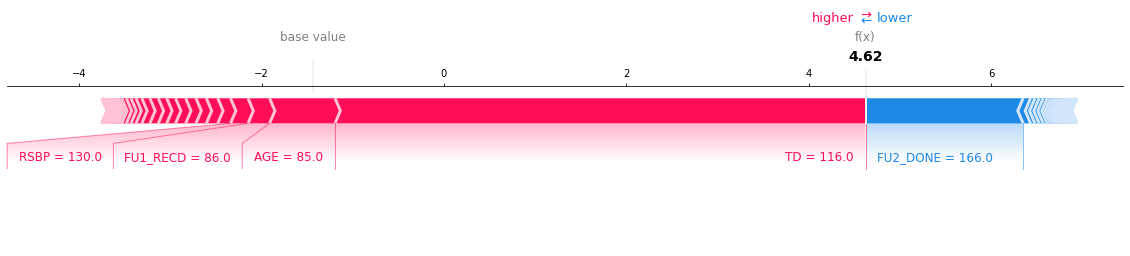

In [51]:
shap_plot(test_input)